In [1]:
# import libraries
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#loading the label(target) in dataframe on which we will train the data
#sum_tab_2.csv has target data for clinical, proteomics and rna
#thus taking just proteomics right now for training on proteomics data
try:
  target = pd.read_csv('sum_tab_2.csv')
  Y = target['RNAseq']
  print('Success: Data loaded into dataframe.')
except Exception as e:
    print('Data load error: ',e)

Success: Data loaded into dataframe.


In [3]:
#loading the proteomics training data in dataframe on which we will train the data
try:
  data = pd.read_csv('train_rna.csv')
  print('Success: Data loaded into dataframe.')
except Exception as e:
    print('Data load error: ',e)

Success: Data loaded into dataframe.


In [4]:
#to check the training data
data.head()

,Training_1,Training_2,Training_3,Training_4,Training_5,Training_6,Training_7,Training_8,Training_9,Training_10,...,Training_71,Training_72,Training_73,Training_74,Training_75,Training_76,Training_77,Training_78,Training_79,Training_80
0,0.810976,0.340575,1.612506,0.768138,1.036180,1.617613,1.292022,0.962942,0.994111,0.583729,...,0.314591,0.992070,1.195645,1.309731,1.406313,0.890083,0.284594,0.596400,0.842055,0.229899
1,0.294094,0.286721,0.347598,0.251778,0.295748,0.096420,0.854710,0.471148,0.409193,0.289036,...,NaN,0.310806,0.459331,0.488802,0.226951,0.398371,0.197815,0.627765,NaN,0.137405
2,2.898144,2.223730,2.206560,2.996356,3.540528,2.064141,0.164002,0.214592,3.628532,1.617814,...,2.934092,0.100898,0.185712,3.088135,1.836085,2.975115,2.608306,2.868174,3.069301,2.983353
3,6.548415,7.355751,7.045954,6.451277,4.952865,8.016981,6.701985,7.123389,7.692460,6.112131,...,6.086940,5.381927,6.400106,7.347566,6.855824,6.130486,6.995109,7.509622,5.912048,6.749030
4,1.004192,0.967359,2.028455,1.142773,1.817558,2.282282,1.195557,1.399497,1.743556,0.487632,...,0.979831,0.853886,1.277587,1.713091,1.198867,0.892595,1.254911,0.878990,0.539391,1.789076


In [5]:
#for transposing as the target has 80 outputs and the data given above has 80 columns and 4118 rows
data = data.T

In [6]:
#to check the transposed training data
data.head()

,0,1,2,3,4,5,6,7,8,9,...,17437,17438,17439,17440,17441,17442,17443,17444,17445,17446
Training_1,0.810976,0.294094,2.898144,6.548415,1.004192,2.519397,5.749835,5.043260,0.297011,4.504254,...,4.237545,5.958848,1.074603,2.055115,3.860331,0.135844,2.781508,5.737653,2.856527,4.245627
Training_2,0.340575,0.286721,2.223730,7.355751,0.967359,2.042327,5.949647,5.540432,0.633366,3.143702,...,4.289768,6.301068,2.412114,3.305907,4.495388,NaN,2.898238,7.049020,4.122308,4.214849
Training_3,1.612506,0.347598,2.206560,7.045954,2.028455,2.829612,5.230059,4.257250,0.614350,3.063500,...,4.185377,5.563719,1.745223,2.838329,3.439241,0.288019,3.023023,7.007265,3.687514,3.706342
Training_4,0.768138,0.251778,2.996356,6.451277,1.142773,1.849382,5.526629,4.904821,0.721755,3.025762,...,4.191994,5.437015,2.375791,3.497647,3.315035,NaN,3.268904,6.744028,1.268706,3.981653
Training_5,1.036180,0.295748,3.540528,4.952865,1.817558,2.204899,4.598606,4.638229,0.238909,3.138107,...,4.908566,6.540738,1.282399,1.788190,3.345020,0.055721,3.140529,5.209790,1.691342,4.903892


In [7]:
#to replace the NaN values by the mean of each row for every individual row
X = data.apply(lambda x: x.fillna(x.mean()),axis=1)

In [8]:
#to check the transposed mean filled training data
X.head()

,0,1,2,3,4,5,6,7,8,9,...,17437,17438,17439,17440,17441,17442,17443,17444,17445,17446
Training_1,0.810976,0.294094,2.898144,6.548415,1.004192,2.519397,5.749835,5.043260,0.297011,4.504254,...,4.237545,5.958848,1.074603,2.055115,3.860331,0.135844,2.781508,5.737653,2.856527,4.245627
Training_2,0.340575,0.286721,2.223730,7.355751,0.967359,2.042327,5.949647,5.540432,0.633366,3.143702,...,4.289768,6.301068,2.412114,3.305907,4.495388,3.339761,2.898238,7.049020,4.122308,4.214849
Training_3,1.612506,0.347598,2.206560,7.045954,2.028455,2.829612,5.230059,4.257250,0.614350,3.063500,...,4.185377,5.563719,1.745223,2.838329,3.439241,0.288019,3.023023,7.007265,3.687514,3.706342
Training_4,0.768138,0.251778,2.996356,6.451277,1.142773,1.849382,5.526629,4.904821,0.721755,3.025762,...,4.191994,5.437015,2.375791,3.497647,3.315035,3.332892,3.268904,6.744028,1.268706,3.981653
Training_5,1.036180,0.295748,3.540528,4.952865,1.817558,2.204899,4.598606,4.638229,0.238909,3.138107,...,4.908566,6.540738,1.282399,1.788190,3.345020,0.055721,3.140529,5.209790,1.691342,4.903892


In [9]:
#to check the label(target) data of proteomics
Y.head()

0    1
1    2
2    3
3    4
4    5
Name: RNAseq, dtype: int64

In [10]:
#Using PCA to reduce the features
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(X)
X_ReducePCA = pd.DataFrame(data = principalComponents)

In [11]:
#to check the dataframe with 10 features
X_ReducePCA.head()

,0,1,2,3,4,5,6,7,8,9
0,1.995782,27.524728,-13.020235,25.885306,-28.016851,-29.775442,54.433310,-16.012573,12.172500,-11.312295
1,-32.474345,-28.753878,-10.787747,26.165891,39.334191,6.596716,2.533423,1.621349,27.454463,35.792985
2,-10.866287,-2.968368,-15.751863,17.399683,-22.990622,-0.786930,-0.499504,-2.110159,-21.389410,12.083298
3,4.568325,23.079816,-3.605822,16.505979,-3.469342,-13.806279,-16.430133,-7.277773,-3.158167,11.958316
4,16.997784,51.969971,-15.739477,-23.799720,8.231163,14.647387,15.046901,3.173528,9.154368,3.644730


In [12]:
#using kmeans clustering on the training proteomics data having reduced features
#reduced features with 80 clusters as 79 are unique (0-79) (appear only once)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_ReducePCA)
y_kmeansPCA = kmeans.predict(X_ReducePCA)

In [13]:
#displaying the labels after clustering on reduced features
y_kmeansPCA

array([0, 1, 1, 0, 3, 1, 2, 2, 1, 1, 1, 3, 3, 0, 2, 1, 2, 1, 3, 2, 2, 0,
       1, 0, 2, 1, 3, 2, 1, 1, 0, 1, 3, 1, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0,
       2, 2, 2, 0, 2, 2, 0, 1, 2, 1, 3, 1, 0, 1, 2, 1, 0, 1, 0, 2, 1, 2,
       3, 0, 1, 3, 1, 1, 2, 3, 2, 0, 1, 1, 0, 0], dtype=int32)

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
#to use RandomForest for feature importance thus reducing the features(4118 columns)
model = RandomForestClassifier(random_state=1, max_depth=10)

In [16]:
model.fit(X,Y)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

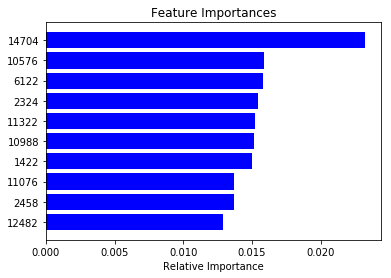

In [17]:
#to display which features(columns) are important on basis of training the data on the Y label (target)
features = X.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [18]:
#displaying which proteomics are top 10 based on importance
Cols = [features[i] for i in indices]
Cols

[12482, 2458, 11076, 1422, 10988, 11322, 2324, 6122, 10576, 14704]

In [19]:
#taking 9 features to get 90% accuracy
cols = [10576, 14704]

In [20]:
#Using the reduced features
X_reduced = X.iloc[:,cols]
X_reduced.head()

,10576,14704
Training_1,0.275279,2.977784
Training_2,1.420696,2.348782
Training_3,0.496684,2.703945
Training_4,0.363323,2.942326
Training_5,0.174972,2.590870


In [21]:
#to display how many points in the label(target) are unique(occur only once)
Y.nunique()

79

In [22]:
RandomForestClassifier_model = RandomForestClassifier(random_state=1, max_depth=10)

In [23]:
RandomForestClassifier_model.fit(X_reduced,Y)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [24]:
Y_predicted_train = RandomForestClassifier_model.predict(X_reduced)
Y_predicted_train

array([ 1,  2,  3,  4,  5, 21,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 12, 20,  6, 22, 23, 24, 25, 44, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 12, 73, 51,
       52, 49, 54, 55, 56,  1, 58, 57, 59, 49, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80])

In [25]:
import sklearn
rna_accuracy = sklearn.metrics.accuracy_score(Y_predicted_train, Y)

In [26]:
rna_accuracy

0.9375

In [27]:
#using kmeans clustering on the training proteomics data having reduced features
#reduced features with 80 clusters as 79 are unique (0-79) (appear only once)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_reduced)
y_kmeans = kmeans.predict(X_reduced)

In [28]:
y_kmeans

array([1, 3, 2, 1, 2, 2, 1, 1, 2, 3, 2, 1, 1, 1, 2, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 3, 2, 1, 3, 3, 1, 2, 3, 2, 2, 1, 2, 3, 3, 2, 3, 2, 2, 1, 2,
       2, 3, 1, 1, 1, 3, 2, 1, 0, 2, 1, 1, 2, 2, 3, 1, 0, 3, 2, 2, 3, 3,
       1, 3, 3, 2, 2, 2, 3, 1, 3, 2, 2, 3, 3, 1], dtype=int32)

In [29]:
try:
    target = pd.read_csv('train_cli.csv')
    Ymsi = target['msi']
    target.gender = pd.factorize(target.gender)[0]
    target.msi = pd.factorize(target.msi)
    print('Success: Data loaded into dataframe.')
except Exception as e:
    print('Data load error: ',e)

Data load error:  Length of values does not match length of index


In [30]:
stacked = target[['gender','msi']].stack()
target[['gender','msi']] = pd.Series(stacked.factorize()[0], index=stacked.index).unstack()
target.head()

,sample,gender,msi,target
0,Training_1,0,1,0
1,Training_2,0,1,0
2,Training_3,2,1,2
3,Training_4,0,1,0
4,Training_5,0,1,0


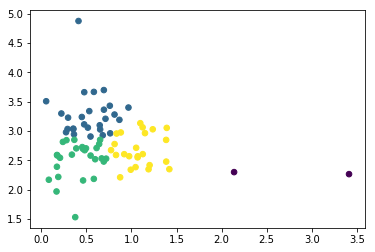

In [33]:
plt.scatter(X_reduced[10576], X_reduced[14704], c=y_kmeans, s=31);

In [117]:
#plt.scatter(X_reduced[5881], X_reduced[13773], c=y_kmeans, s=31);

In [34]:
Ymsi.head()

0    MSI-Low/MSS
1    MSI-Low/MSS
2    MSI-Low/MSS
3    MSI-Low/MSS
4    MSI-Low/MSS
Name: msi, dtype: object

In [35]:
a =[]
b =[]
c =[]
d=[]

for i in range(0,80):
    if y_kmeans[i] ==0:
        a.append(i)
    if y_kmeans[i] ==1:
        b.append(i)
    if y_kmeans[i] ==2:
        c.append(i)
    if y_kmeans[i] ==3:
        d.append(i)

In [36]:
a,b,c,d

([52, 60],
 [0,
  3,
  6,
  7,
  11,
  12,
  13,
  18,
  19,
  20,
  21,
  22,
  23,
  26,
  29,
  34,
  42,
  46,
  47,
  48,
  51,
  54,
  55,
  59,
  66,
  73,
  79],
 [2,
  4,
  5,
  8,
  10,
  14,
  25,
  30,
  32,
  33,
  35,
  38,
  40,
  41,
  43,
  44,
  50,
  53,
  56,
  57,
  62,
  63,
  69,
  70,
  71,
  75,
  76],
 [1,
  9,
  15,
  16,
  17,
  24,
  27,
  28,
  31,
  36,
  37,
  39,
  45,
  49,
  58,
  61,
  64,
  65,
  67,
  68,
  72,
  74,
  77,
  78])

In [37]:
a_refined= []
for index in a:
    print(Ymsi[index],index)

MSI-High 52
MSI-Low/MSS 60


In [38]:
a_refined=[]
for index in a:
    if Ymsi[index]=='MSI-Low/MSS':
        a_refined.append(index)
a_refined

[60]

In [39]:
for index in b:
    print(Ymsi[index],index)

MSI-Low/MSS 0
MSI-Low/MSS 3
MSI-High 6
MSI-High 7
MSI-High 11
MSI-Low/MSS 12
MSI-Low/MSS 13
MSI-Low/MSS 18
MSI-High 19
MSI-Low/MSS 20
MSI-Low/MSS 21
MSI-Low/MSS 22
MSI-Low/MSS 23
MSI-Low/MSS 26
MSI-Low/MSS 29
MSI-Low/MSS 34
MSI-Low/MSS 42
MSI-Low/MSS 46
MSI-Low/MSS 47
MSI-Low/MSS 48
MSI-Low/MSS 51
MSI-Low/MSS 54
MSI-Low/MSS 55
MSI-Low/MSS 59
MSI-Low/MSS 66
MSI-Low/MSS 73
MSI-Low/MSS 79


In [40]:
b_refined=[]
for index in b:
    if Ymsi[index]=='MSI-Low/MSS':
        b_refined.append(index)
b_refined

[0,
 3,
 12,
 13,
 18,
 20,
 21,
 22,
 23,
 26,
 29,
 34,
 42,
 46,
 47,
 48,
 51,
 54,
 55,
 59,
 66,
 73,
 79]

In [41]:
for index in c:
    print(Ymsi[index],index)

MSI-Low/MSS 2
MSI-Low/MSS 4
MSI-High 5
MSI-Low/MSS 8
MSI-Low/MSS 10
MSI-High 14
MSI-Low/MSS 25
MSI-Low/MSS 30
MSI-Low/MSS 32
MSI-Low/MSS 33
MSI-Low/MSS 35
MSI-High 38
MSI-Low/MSS 40
MSI-Low/MSS 41
MSI-Low/MSS 43
MSI-Low/MSS 44
MSI-Low/MSS 50
MSI-Low/MSS 53
MSI-Low/MSS 56
MSI-Low/MSS 57
MSI-Low/MSS 62
MSI-High 63
MSI-Low/MSS 69
MSI-Low/MSS 70
MSI-High 71
MSI-Low/MSS 75
MSI-Low/MSS 76


In [42]:
c_refined=[]
for index in c:
    if Ymsi[index]=='MSI-Low/MSS':
        c_refined.append(index)
c_refined

[2,
 4,
 8,
 10,
 25,
 30,
 32,
 33,
 35,
 40,
 41,
 43,
 44,
 50,
 53,
 56,
 57,
 62,
 69,
 70,
 75,
 76]

In [43]:
for index in d:
    print(Ymsi[index],index)

MSI-Low/MSS 1
MSI-High 9
MSI-Low/MSS 15
MSI-Low/MSS 16
MSI-Low/MSS 17
MSI-Low/MSS 24
MSI-Low/MSS 27
MSI-Low/MSS 28
MSI-Low/MSS 31
MSI-Low/MSS 36
MSI-High 37
MSI-Low/MSS 39
MSI-High 45
MSI-High 49
MSI-Low/MSS 58
MSI-Low/MSS 61
MSI-Low/MSS 64
MSI-High 65
MSI-High 67
MSI-Low/MSS 68
MSI-High 72
MSI-High 74
MSI-Low/MSS 77
MSI-Low/MSS 78


In [44]:
d_refined=[]
for index in d:
    if Ymsi[index]=='MSI-Low/MSS':
        d_refined.append(index)
d_refined

[1, 15, 16, 17, 24, 27, 28, 31, 36, 39, 58, 61, 64, 68, 77, 78]

In [45]:
refined=[]
refined=a_refined + b_refined + c_refined + d_refined
len(refined)

62

In [46]:
try:
  target = pd.read_csv('train_CLI.csv')
  target.T
  gender = target['gender']
  print('Success: Data loaded into dataframe.')
except Exception as e:
    print('Data load error: ',e)

Success: Data loaded into dataframe.


In [47]:
gender.head()

0    Female
1    Female
2      Male
3    Female
4    Female
Name: gender, dtype: object

In [48]:
a_refined= []
for index in a:
    print(gender[index],index)

Male 52
Male 60


In [49]:
a_refined=[]
for index in a:
    if gender[index]=='Female':
        a_refined.append(index)
a_refined

[]

In [50]:
for index in b:
    print(gender[index],index)

Female 0
Female 3
Female 6
Female 7
Female 11
Female 12
Female 13
Female 18
Male 19
Female 20
Female 21
Female 22
Male 23
Female 26
Male 29
Female 34
Female 42
Female 46
Female 47
Male 48
Female 51
Female 54
Female 55
Male 59
Female 66
Male 73
Female 79


In [51]:
b_refined=[]
for index in b:
    if gender[index]=='Female':
        b_refined.append(index)
b_refined

[0,
 3,
 6,
 7,
 11,
 12,
 13,
 18,
 20,
 21,
 22,
 26,
 34,
 42,
 46,
 47,
 51,
 54,
 55,
 66,
 79]

In [52]:
for index in c:
    print(gender[index],index)

Male 2
Female 4
Male 5
Female 8
Female 10
Male 14
Female 25
Female 30
Male 32
Female 33
Male 35
Female 38
Female 40
Female 41
Male 43
Male 44
Male 50
Female 53
Female 56
Female 57
Female 62
Female 63
Male 69
Female 70
Female 71
Male 75
Female 76


In [53]:
c_refined=[]
for index in c:
    if gender[index]=='Female':
        c_refined.append(index)
c_refined

[4, 8, 10, 25, 30, 33, 38, 40, 41, 53, 56, 57, 62, 63, 70, 71, 76]

In [54]:
for index in d:
    print(gender[index],index)

Female 1
Female 9
Female 15
Female 16
Female 17
Male 24
Male 27
Female 28
Male 31
Male 36
Female 37
Male 39
Female 45
Female 49
Female 58
Female 61
Male 64
Female 65
Female 67
Male 68
Male 72
Female 74
Female 77
Male 78


In [55]:
d_refined=[]
for index in d:
    if gender[index]=='Female':
        d_refined.append(index)
d_refined

[1, 9, 15, 16, 17, 28, 37, 45, 49, 58, 61, 65, 67, 74, 77]

In [56]:
refined=[]
refined=a_refined + b_refined + c_refined + d_refined
len(refined)

53

In [57]:
#to display in which cluster each data belongs
y_kmeans

array([1, 3, 2, 1, 2, 2, 1, 1, 2, 3, 2, 1, 1, 1, 2, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 3, 2, 1, 3, 3, 1, 2, 3, 2, 2, 1, 2, 3, 3, 2, 3, 2, 2, 1, 2,
       2, 3, 1, 1, 1, 3, 2, 1, 0, 2, 1, 1, 2, 2, 3, 1, 0, 3, 2, 2, 3, 3,
       1, 3, 3, 2, 2, 2, 3, 1, 3, 2, 2, 3, 3, 1], dtype=int32)

In [58]:
#to display in which cluster each data belongs
y_kmeans

array([1, 3, 2, 1, 2, 2, 1, 1, 2, 3, 2, 1, 1, 1, 2, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 3, 2, 1, 3, 3, 1, 2, 3, 2, 2, 1, 2, 3, 3, 2, 3, 2, 2, 1, 2,
       2, 3, 1, 1, 1, 3, 2, 1, 0, 2, 1, 1, 2, 2, 3, 1, 0, 3, 2, 2, 3, 3,
       1, 3, 3, 2, 2, 2, 3, 1, 3, 2, 2, 3, 3, 1], dtype=int32)

In [31]:
#to check that clustering was correct, i.e 80 clusters were formed
pd.DataFrame(y_kmeans).nunique()

0    80
dtype: int64

In [213]:
#importing the testing proteomics data 
import pandas as pd
import numpy as np

tsv_file='test_pro.tsv'
csv_table=pd.read_table(tsv_file,sep='\t')
csv_table.to_csv('test_pro1.csv',index=False)

In [214]:
#loading the testing proteomics data in "tdata" dataframe
try:
  tdata = pd.read_csv('test_pro1.csv')
  print('Success: Data loaded into dataframe.')
except Exception as e:
    print('Data load error: ',e)

Success: Data loaded into dataframe.


In [215]:
#to display the testing proteomics data
tdata.head()

,Testing_1,Testing_2,Testing_3,Testing_4,Testing_5,Testing_6,Testing_7,Testing_8,Testing_9,Testing_10,...,Testing_71,Testing_72,Testing_73,Testing_74,Testing_75,Testing_76,Testing_77,Testing_78,Testing_79,Testing_80
0,3.446723,3.669580,3.398472,3.112875,3.535956,3.222556,4.011226,3.660633,2.459769,3.529445,...,2.747886,3.107907,2.796258,3.975565,3.854046,3.840117,2.531494,2.642408,3.913182,4.141304
1,5.994520,6.371038,6.132440,5.645341,5.532811,5.754886,5.917435,6.056136,5.526915,5.652671,...,6.164473,6.404276,5.067085,6.497901,5.259377,6.172335,5.496268,6.395966,5.963701,6.308505
2,2.168001,2.410543,NaN,2.211822,0.987561,1.737837,2.381688,2.193863,1.759665,2.310238,...,2.842435,1.694889,1.520694,2.860077,2.233857,2.305192,1.470474,1.073909,1.102109,1.088823
3,NaN,1.024838,NaN,1.099892,1.076615,1.001861,1.924734,1.024838,NaN,1.878005,...,2.481767,NaN,1.978784,1.024838,NaN,0.990946,2.821773,1.428959,NaN,NaN
4,NaN,0.991114,1.096724,1.056902,NaN,NaN,1.010897,0.991114,NaN,1.010897,...,1.181934,1.044511,1.010897,0.991114,1.066978,NaN,1.911122,NaN,1.040694,NaN


In [216]:
#to replace the NaN values by the mean of each row for every individual row
X_tdata = tdata.apply(lambda x: x.fillna(x.mean()),axis=0)

In [217]:
#to display the testing proteomics data having NaN values replaced by mean for every individual row
replacedX_data=X_tdata
replacedX_data.head()

,Testing_1,Testing_2,Testing_3,Testing_4,Testing_5,Testing_6,Testing_7,Testing_8,Testing_9,Testing_10,...,Testing_71,Testing_72,Testing_73,Testing_74,Testing_75,Testing_76,Testing_77,Testing_78,Testing_79,Testing_80
0,3.446723,3.669580,3.398472,3.112875,3.535956,3.222556,4.011226,3.660633,2.459769,3.529445,...,2.747886,3.107907,2.796258,3.975565,3.854046,3.840117,2.531494,2.642408,3.913182,4.141304
1,5.994520,6.371038,6.132440,5.645341,5.532811,5.754886,5.917435,6.056136,5.526915,5.652671,...,6.164473,6.404276,5.067085,6.497901,5.259377,6.172335,5.496268,6.395966,5.963701,6.308505
2,2.168001,2.410543,2.691813,2.211822,0.987561,1.737837,2.381688,2.193863,1.759665,2.310238,...,2.842435,1.694889,1.520694,2.860077,2.233857,2.305192,1.470474,1.073909,1.102109,1.088823
3,2.702256,1.024838,2.691813,1.099892,1.076615,1.001861,1.924734,1.024838,2.696292,1.878005,...,2.481767,2.693591,1.978784,1.024838,2.696690,0.990946,2.821773,1.428959,2.701440,2.710897
4,2.702256,0.991114,1.096724,1.056902,2.715043,2.709113,1.010897,0.991114,2.696292,1.010897,...,1.181934,1.044511,1.010897,0.991114,1.066978,2.707427,1.911122,2.719052,1.040694,2.710897


In [218]:
#for transposing as the target has 80 outputs and the data given above has 80 columns and 4118 rows
X_tdata = X_tdata.T

In [222]:
target = pd.read_csv('sum_tab_2.csv')
YPro = target['Proteomics']

In [219]:
#for displaying the transposed data
#X_tdata

In [39]:
#to allocate the 80 columns in X_tdata for using it for training (X value in model(X,Y) where Y is target(label))
X_tdata = X_tdata.iloc[:,Cols]

In [40]:
#to use k-means on test proteomics data and cluster them
y_test = kmeans.predict(X_tdata)

In [41]:
#to display the clusters in which every data is predicted to belong to
y_test

array([74, 17, 34,  6, 31, 15, 55,  9, 54, 17, 56, 59, 27, 17, 58, 50, 64,
       71, 72,  1, 57,  1, 34, 61, 55, 64, 35, 44,  8, 75, 33, 28, 58, 71,
       27, 42, 44, 32, 35, 30,  2, 54, 39, 58, 70, 61,  4, 78, 78,  6, 58,
       44, 39, 28, 33, 58, 31, 23, 68, 59,  0, 11, 43, 70, 66, 17, 34, 45,
       64,  1, 72, 58, 19,  5,  2, 48, 79, 25, 27, 29], dtype=int32)

In [220]:
from sklearn.ensemble import RandomForestClassifier

In [221]:
#to use RandomForest for feature importance thus reducing the features(4118 columns)
model = RandomForestClassifier(random_state=1, max_depth=10)

In [223]:
model.fit(X_tdata,YPro)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

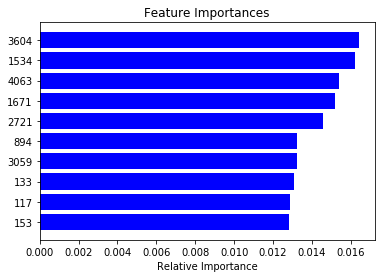

In [224]:
#to display which features(columns) are important on basis of training the data on the Y label (target)
features = X.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [225]:
#displaying which proteomics are top 10 based on importance
Cols = [features[i] for i in indices]
Cols

[153, 117, 133, 3059, 894, 2721, 1671, 4063, 1534, 3604]

In [262]:
#taking 10 features to get 90% accuracy
cols = [153, 117, 133, 3059, 894, 2721, 1671, 4063, 1534, 3604]

In [263]:
#Using the reduced features
X_reduced = X.iloc[:,cols]
X_reduced.head()

,153,117,133,3059,894,2721,1671,4063,1534,3604
Training_1,3.961683,5.370055,3.200476,4.413065,1.848341,4.094841,2.691781,3.258495,4.951783,1.621761
Training_2,3.336937,5.063238,4.460308,3.997449,2.878443,3.283029,4.677450,4.987202,4.232572,1.050907
Training_3,2.807499,5.213649,2.693344,4.694786,1.895561,3.825931,4.455182,3.423881,6.751444,1.057698
Training_4,3.316228,5.107847,3.639396,5.005726,1.453861,4.064748,3.224969,3.597734,6.146736,0.389452
Training_5,3.597370,5.257573,2.056838,4.881578,1.616420,3.465226,1.470011,2.433180,3.870047,0.850665


In [264]:
RandomForestClassifier_model = RandomForestClassifier(random_state=1, max_depth=10)

In [265]:
RandomForestClassifier_model.fit(X_reduced,Y)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [266]:
Y_predicted_train = RandomForestClassifier_model.predict(X_reduced)
Y_predicted_train

array([ 1,  2,  3,  4,  5, 21,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20,  6, 22, 23, 24, 25, 36, 27, 28, 29, 30, 31, 32, 33, 34,
       74, 36, 37, 38, 39, 40, 41, 42, 43, 44, 74, 46, 47, 48, 74, 50, 51,
       52, 52, 54, 63, 56,  1, 58, 57, 59,  1, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 62, 79, 80])

In [269]:
import sklearn
rna_accuracy_test = sklearn.metrics.accuracy_score(Y_predicted_train, Y)

In [270]:
rna_accuracy_test

0.9